# Linear Regression Project

**About:** You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out.

**Note:** email, address are fake to protect customer privacy.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

## Data

This is a file from the company which contains data on customer information, including their emails and address. There's also numerical values we can play around with:

* Avg. Session: The average session of in-store style advice session
* Time on App: The average time in minutes spent on the store app
* Time on Website: The average time in minutes spent on the store website
* Length of Membership: The lenght of time, in years, the customer has been a member of the store

In [2]:
#Reading the Ecommerce Customers csv file as customers

customers = pd.read_csv('Ecommerce Customers')

customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Exploratory Data Analysis 

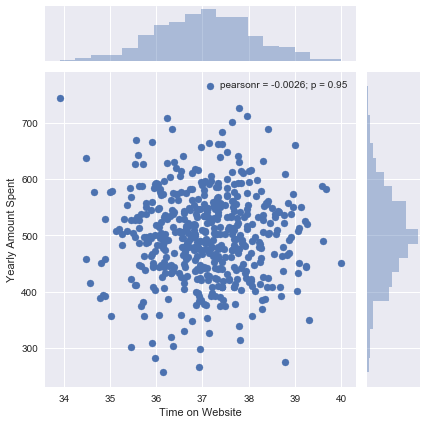

In [5]:
# Time on website v yearly amount spent

sb.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

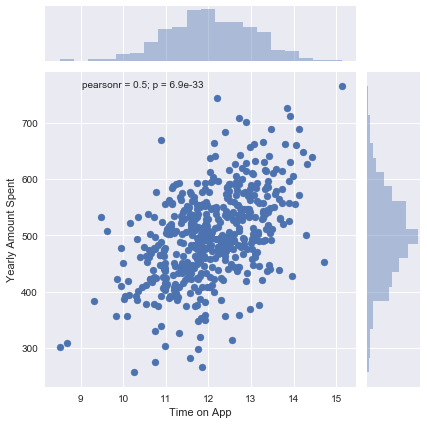

In [6]:
#Time on app v yearly amount spent

sb.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

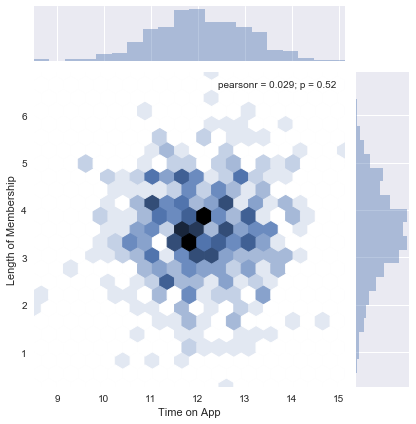

In [7]:
sb.jointplot(x='Time on App',y='Length of Membership',data=customers, kind= 'hex')

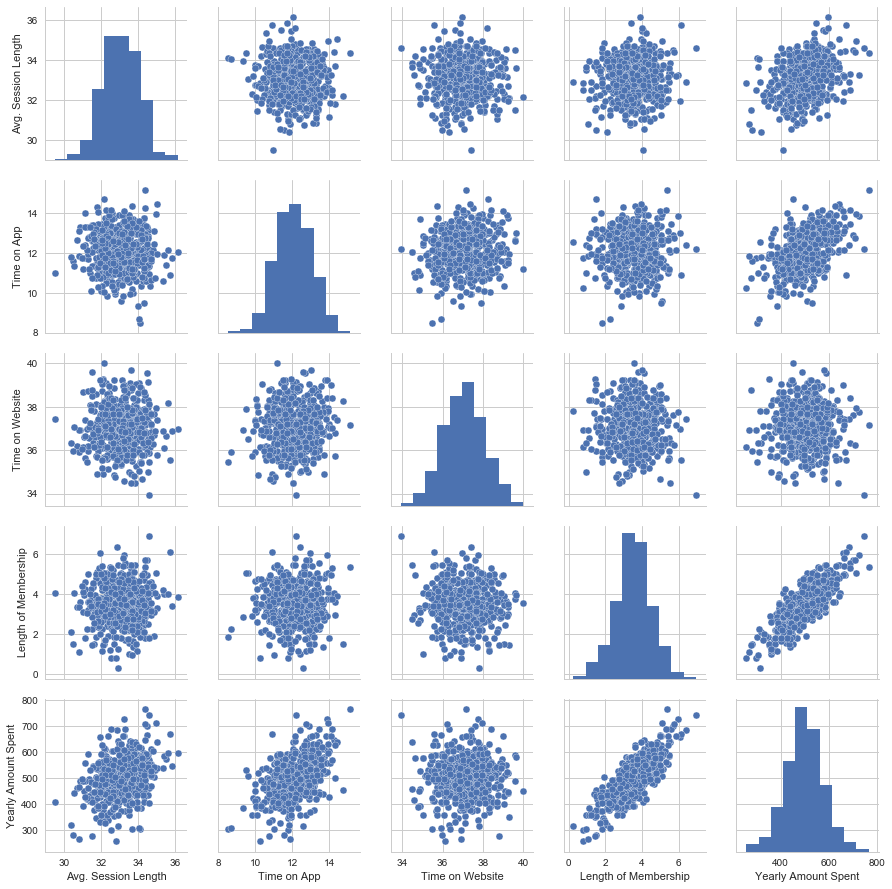

In [8]:
#Pairplot used to explore relationships with all the feature of this dataset

sb.set_style('whitegrid')
sb.pairplot(customers)

Based on the pairplot, the length of membership feature correlates with the yearly amount spent; the longer the customers has been a member of the store, they are likely to spend more than those who've been a member for a shorter amount of time.

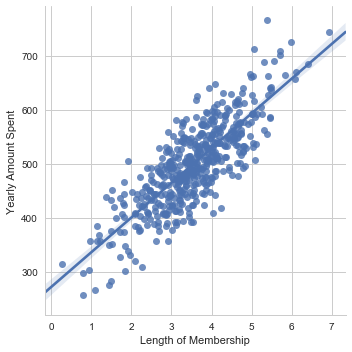

In [9]:
sb.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## Training and Testing Data 

Now to split the data into training and testing sets. Lets set the C variable the numerical feature of the customers, and y being the Yearly Amount Spent column.

In [10]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [11]:
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [12]:
y = customers['Yearly Amount Spent']

Using Sklearn's model_selection.train_test_split to split the data into a training set and a test test. Let's set test size as 0.30 and random_state as 101.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Train the model

Now to train the Linear Regression model using the training data. Import the LinearRegression from sklearn.linear_model.

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
#Create an instance
lm = LinearRegression()

In [17]:
#Fit method used to train on the data
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The coefficients and intercept for our model:

In [18]:
#Print out coefficients and intercept for our linear regression model with coef_ and intercept_ method
print('Coefficients: ',lm.coef_)
print('\n')
print('Intercept: ',lm.intercept_)

Coefficients:  [ 25.98154972  38.59015875   0.19040528  61.27909654]


Intercept:  -1047.93278225


## Predicting Test Data 

Let's evaluate the model by predicting offf the test values. The x test values will be used to make the prediction.

In [19]:
#Predict method to fit to lm
pred = lm.predict(X_test)

In [20]:
#Returns array of predicted values
pred

array([ 456.44186104,  402.72005312,  409.2531539 ,  591.4310343 ,
        590.01437275,  548.82396607,  577.59737969,  715.44428115,
        473.7893446 ,  545.9211364 ,  337.8580314 ,  500.38506697,
        552.93478041,  409.6038964 ,  765.52590754,  545.83973731,
        693.25969124,  507.32416226,  573.10533175,  573.2076631 ,
        397.44989709,  555.0985107 ,  458.19868141,  482.66899911,
        559.2655959 ,  413.00946082,  532.25727408,  377.65464817,
        535.0209653 ,  447.80070905,  595.54339577,  667.14347072,
        511.96042791,  573.30433971,  505.02260887,  565.30254655,
        460.38785393,  449.74727868,  422.87193429,  456.55615271,
        598.10493696,  449.64517443,  615.34948995,  511.88078685,
        504.37568058,  515.95249276,  568.64597718,  551.61444684,
        356.5552241 ,  464.9759817 ,  481.66007708,  534.2220025 ,
        256.28674001,  505.30810714,  520.01844434,  315.0298707 ,
        501.98080155,  387.03842642,  472.97419543,  432.87046

In [21]:
#Actual y values (Yearly Amount Spent)
y_test

18     452.315675
361    401.033135
104    410.069611
4      599.406092
156    586.155870
350    535.480775
32     588.712606
205    712.396327
81     462.897636
414    532.724805
489    327.377953
474    492.556834
95     543.340166
355    403.766902
65     765.518462
39     537.846195
368    708.935185
236    501.928265
318    564.790969
435    571.216005
12     408.640351
211    548.518529
289    467.427849
243    490.600443
241    571.471034
382    410.602944
457    534.771485
320    368.654785
64     540.263400
335    443.441860
          ...    
143    350.058200
271    628.047804
56     520.898794
475    535.321610
272    582.491924
433    434.144202
154    595.803819
200    504.870432
53     451.457447
385    414.935061
312    319.928870
51     442.667252
468    553.994674
345    461.790959
233    463.745981
237    376.336901
317    404.824529
450    475.015407
324    559.199048
170    421.966794
266    554.003093
133    542.711558
430    556.186369
15     461.780742
13     573

Using matplotlib to plot the actual test values against the predicted values.

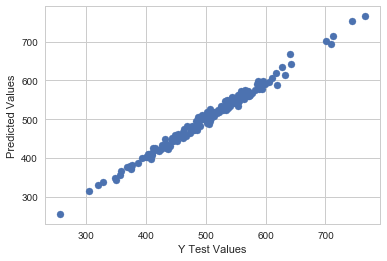

In [22]:
plt.scatter(y_test,pred)
plt.xlabel('Y Test Values')
plt.ylabel('Predicted Values')

From this plot there's a straight line, so it's very good fit.

## Evaluation of model

We can evaluate the performance of our model by calculating the residual sum of squares.

In [23]:
#Import metrics to calculate mean absolute error, mean squared error, and root mean squared error.
from sklearn import metrics

print("MAE:",metrics.mean_absolute_error(y_test,pred))
print("MSE:",metrics.mean_squared_error(y_test,pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 7.22814865343
MSE: 79.813051651
RMSE: 8.93381506698


#### Residuals 

C:\Users\Ban\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


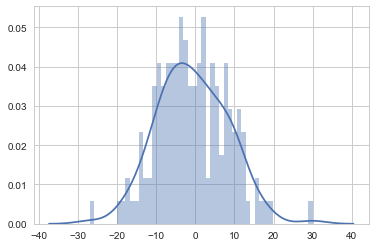

In [25]:
#Residuals, the difference between the observed values and the predicted values
sb.distplot([y_test - pred], bins = 50)

## Conclusion 

In [26]:
cc = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficients'])
cc

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


* With all others features fixed,a 1 unit increase in **Avg.Session Length** is associated with an **increase of £25.98 spent.**

* With all others features fixed,a 1 unit increase in **Time on App** is associated with an **increase of £38.59 spent.**

* With all others features fixed,a 1 unit increase in **Time on Website** is associated with an **increase of £0.19 spent.**

* With all others features fixed,a 1 unit increase in **Length on Membership** is associated with an **increase of £61.28 spent.**


From this we can see the time on app does bring in more spending than the website. It's really up to the company whether to focus on the website to match the level of the app, or develop the app since it is working better. Probably worth exploring the relationship between the length of membership with the mobile app or the website before reaching a conclusion.